In [43]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [27]:
housing = pd.read_csv('./data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


# Association of random variables

## Quantifying association with covariance <br/><br/>
1. Population $\rightarrow$ $$Cov(X,Y) = \sum_{i=1}^{N}\frac{(X_{i}-\mu_{X})(Y_{i}-\mu_{Y})}{N}$$<br/><br/>
2. Sample $\rightarrow$ $$Cov(X,Y) = \sum_{i=1}^{n}\frac{(X_{i}-\bar{X})(Y_{i}-\bar{Y})}{n-1}$$

In [28]:
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


## Quantifying association with correlation

1. Population $\rightarrow$ $$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_{X} \sigma_{Y}}$$<br/><br/>
2. Sample $\rightarrow$ $$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_{S_{X}} \sigma_{S_{Y}}}$$

In [29]:
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


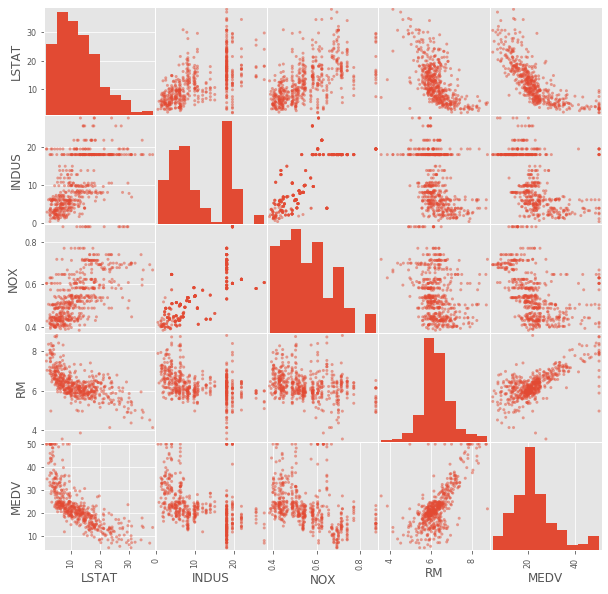

In [30]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10,10));

# Simple linear Regression Model

1. Response: Price change in the next 5 s.
2. Predictors : Price, volume history of the last 10 mins.

This is called modeling:<br/><br/>
1. Model : $y = f(x_{1}, x_{2}, x_{3}, ...)$
2. Linear Regression Model : $y = b_{0}+b_{1}x_{1}+b_{2}x_{2}+b_{3}x_{3}+...$
3. Simple linear regression model: $y=b_{0}+b_{1}x_{1}$

Asumsi: <br/><br/>
1. Population model $\rightarrow$ $y_{i} = \beta_{0} + \beta_{1}x_{i} + \epsilon_{i}$, where <br/>
$\epsilon_{i}$ ~ $N(0,\sigma^{2})$
2. Mean equation $\rightarrow$ $\mu_{y|x_{i}} = \beta_{0} + \beta_{1}x_{i}$<br/>
Use samples to estimate $\beta_{0}, \beta_{1}, \sigma$
<br/><br/>
asumsi berikut (yg jelas asumsi):
1. Linearity
2. Independence
3. Normality
4. Equal variance

In [31]:
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1 * housing['RM']

In [32]:
housing['observedError'] = housing['MEDV'] - housing['GuessResponse']
indices = [7,20,100]
print(housing['observedError'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observedError, dtype: float64


$$SSE = \sum_{i=1}^{N}\epsilon_{i}$$

In [33]:
print('Sum of squared error is ', (housing['observedError']**2).sum())

Sum of squared error is  75291.32258800001


minimize SSE

Ordinary least squared method: <br/><br/>
1. $b_{1} =\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}$
2. $b_{0} = \bar{y} - b_{1}\bar{x}$

In [34]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV~RM', data = housing).fit()

b0 = model.params[0]
b1 = model.params[0]

housing['BestResponse'] = b0 + b1 * housing['RM']

KeyError: 'y'

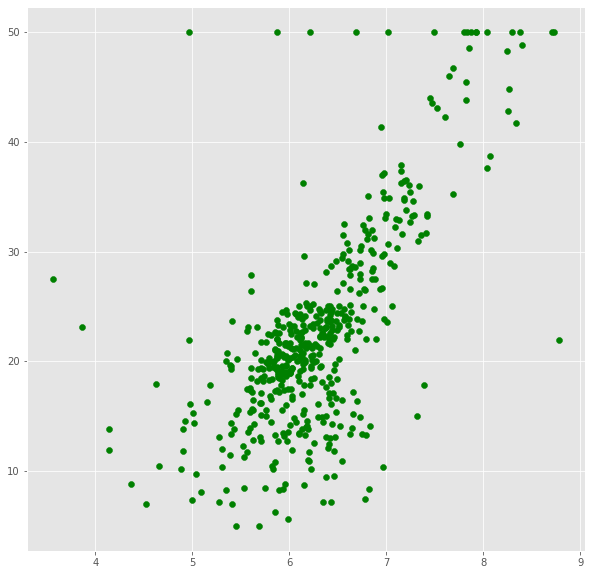

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real');
plt.scatter(housing['RM'], housing['y'], color='b', label='model');
plt.plot(housing['RM'], housing['GuessResponse'], color='red');
plt.plot(housing['RM'], housing['BestResponse'], color='yellow');
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
#plt.xlim(np.min(housing['RM'])-2, np.max(housing['RM'])+2);
#plt.ylim(np.min(housing['RM'])-2, np.max(housing['RM'])+2);
plt.legend()
plt.show()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        02:35:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P >|t| (p-value slope) di bagian RM

* $H_{0} : \beta_{1} = 0 $<br/>
* $H_{1} : \beta_{1} \neq 0 $ <br/><br/>

$$\hat{t} = \frac{b_{1} - \beta_{1}}{S_{b_{1}}}$$

$$p-value = 0.0000 < 0.05$$, reject $H_{0}$!

Sehingga kita hanya punya 5% kesempatan untuk mengikutsertakan RM ke dalam model sebagai kesalahan.

CI dari slope: dua tabel terakhir (RM) 95%<br/><br/>
95% of CI   $8.279 <\beta_{1} <9.925$

Kita juga harus perhatikan R-squared

Performance of the model: <br /><br />
1. Total variation
$$SST = \sum_{i=1}^{N}(y - \bar{y})^{2}$$
2. Variation explained
$$SSR = \sum_{i=1}^{N}(\hat{y} - \bar{y})^{2}$$
3. Variation unexplained
$$SSE = \sum_{i=1}^{N}(\hat{y}-y)^{2}$$


Total variation = variation explained + Variation unexplained

$$R^{2} = 1 - \frac{Variation unexplained}{Total variation}$$

$$ R^{2} - 0.484$$

About 48.4% of variations of MEDV can be explained by our model.

1. MEDV is not uniquely determined by our model.
2. $R^{2}$ is already high enough for noisy data.

# Diagnostic of Linear Regression Model

## Linearity (Scatter Plot)

Text(0.5, 0, 'RM/number')

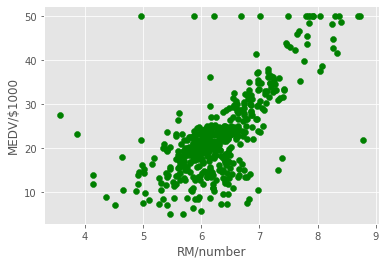

In [37]:
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real');
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')

## Independence

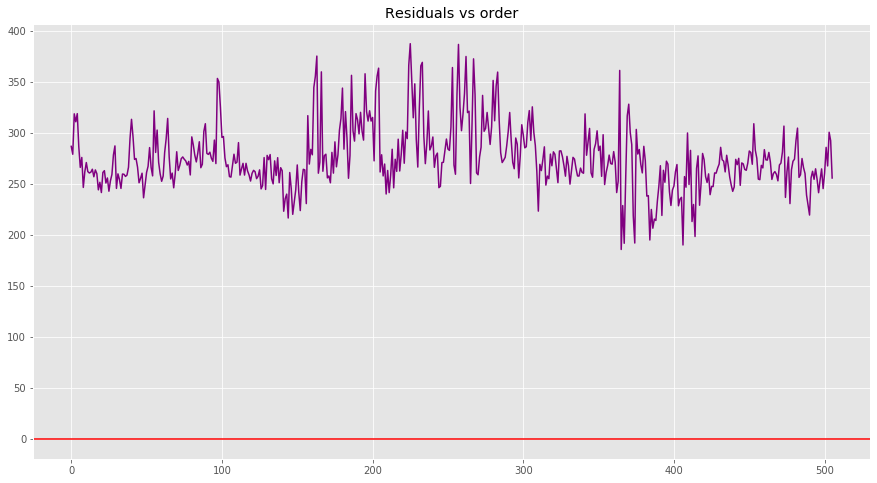

In [38]:
housing['Error'] = housing['MEDV'] - housing['BestResponse']
plt.figure(figsize=(15,8))
plt.title('Residuals vs order')
plt.plot(housing.index, housing['Error'], color='purple');
plt.axhline(y=0, color='red');

## Durbin Watson test for serial correlation

$$d = \frac{\sum_{t=2}^{T}(e_{t} - e_{t-1})^{2}}{\sum_{t=1}^{T}e_{t}^{2}}$$

d = 0.684

Kalo di range 1.5 s/d 2.5 itu msh termasuk normal.

Kalo dibawah 1.5 error nya berkorelasi positif, kalo di atas 2.5 errornya berkorelasi negatif.

## Normality

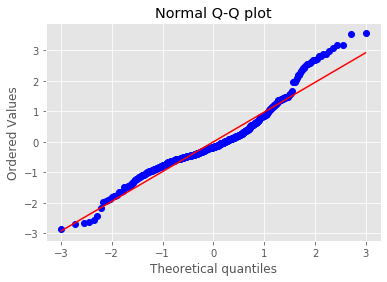

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt
z = (housing['Error'] - housing['Error'].mean())/housing['Error'].std(ddof=1)

stats.probplot(z, dist='norm', plot = plt);
plt.title('Normal Q-Q plot')
plt.show()

Masih bisa diterima meskipun agak deviates in the right tail

## Equal variance

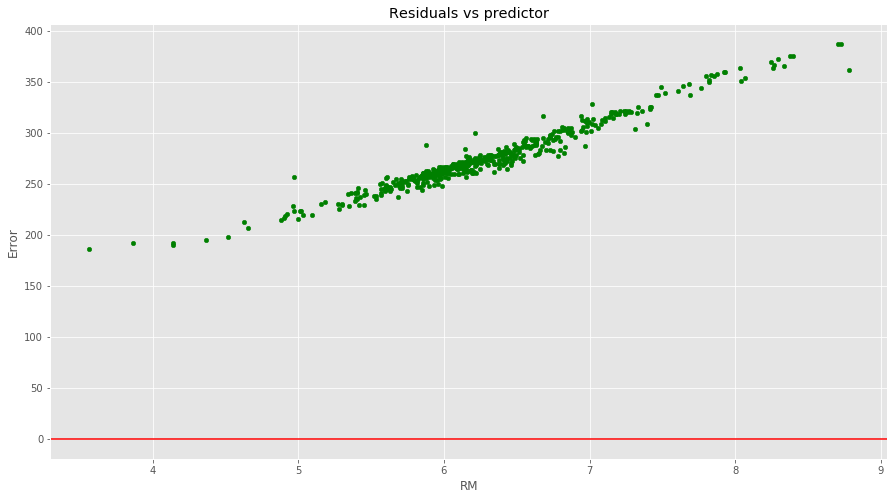

In [42]:
housing.plot(kind='scatter', x = 'RM', y = 'Error', figsize=(15,8), color = 'green')
plt.title('Residuals vs predictor')
plt.axhline(y=0, color='red');